# Autoproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

<font color="blue">
Vooreerst worden de nodige packages geïmporteerd, de plot-styles bepaald en de cars-dataset ingelezen naar een DataFrame. <br>
Alleen de <b>Volvo's</b> worden weerhouden.
    
Om een gevoel te krijgen met de dataset, worden het aantal rijen en kolommen opgevraagd, en de kolommen gescreend op missing values.
    
<br>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import numpy as np
import math
import os
!pip install --upgrade scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/d4/a1/d4adf25b6d2bef8d0ad1682829dcfcba97f3f96bb5b6f137bc3e41003cc7/scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 131.3 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.6 kB 131.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 269.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/46.2 MB 2.4 MB/s eta 0:00:20
   ---------------------------------------- 0.5/46.2 MB 5.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/46.2 MB 9.9 MB/s eta 0:00:05
   -- -----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [3]:
# Styling
plt.rcParams['axes.grid'] = False
    
plt.rcParams['legend.frameon'] = False

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
    
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#9467bd', '#e377c2'])
    
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 12

In [4]:
# Data inlezen
file_path = os.path.join(os.path.dirname(os.getcwd()),"Data\Input\cars.csv")

all_cars = pd.read_csv(file_path)

# Volvo's filteren
cars = all_cars[all_cars['manufacturer'] == 'Volvo'].copy().reset_index(drop=True)

In [5]:
cars.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
1888,Volvo,XC90 Momentum,2021,25935.0,4,Automatic,NaN,Gasoline,NaN,Denim Blue Metallic,Blond,0.0,1.0,0.0,Ken Garff Volvo Cars,NaN,5.0,21.0,NaN,48671.0
4658,Volvo,S90 B6 Inscription,2022,945.0,2.0L I4 16V GDI DOHC Turbo,Automatic,All-wheel Drive,Gasoline,NaN,Crystal White Metallic,Blond,0.0,1.0,0.0,Volvo Cars South Bay,3.9,NaN,0.0,1500.0,53999.0
1486,Volvo,XC90 T6 Momentum,2016,72000.0,2.0L I4 16V GDI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,20-25,Luminous Sand,Charcoal,0.0,1.0,1.0,Impex Auto Sales,4.7,4.5,70.0,NaN,23815.0
1112,Volvo,XC90 T6 Inscription,2018,62673.0,2.0L I4 16V GDI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,20-27,White,Maroon Brown,0.0,0.0,1.0,Affinity Auto Sales,NaN,4.8,110.0,NaN,37450.0
5965,Volvo,XC60 T5 Premier,2016,93097.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,19-26,Black,Off Black,0.0,0.0,0.0,MD Motors,NaN,4.9,34.0,NaN,18999.0


In [6]:
cars.shape

(10029, 20)

In [7]:
print(cars.isna().sum())

manufacturer              0
model                     0
year                      0
mileage                   3
engine                   46
transmission             63
drivetrain              226
fuel_type                17
mpg                    2306
exterior_color          183
interior_color         1259
accidents_or_damage     617
one_owner               703
personal_use_only       620
seller_name             102
seller_rating          2685
driver_rating           561
driver_reviews_num        0
price_drop             4303
price                     0
dtype: int64


### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

<font color="blue">
    
- <b>year</b> is categorisch, ordinaal. Jaartallen zijn natuurlijke getallen met een rangschikking, maar omdat het niet zinvol is om jaartallen op te tellen, beschouwen we year als categorisch.        

- <b>fuel_type</b> is categorisch, niet-ordinaal.    

- <b>seller_rating</b> is categorisch, ordinaal. Ratings zijn decimale getallen met een rangschikking, maar omdat het niet zinvol is om ratings op te tellen, beschouwen we seller_rating als categorisch.
    
Hieronder worden ook de waarden van de variabelen getoond, inclusief een <u>barchart voor fuel-type</u>. <br>
Daaruit blijkt dat 3 fuel-types dominant vertegenwoordigd zijn in de dataset van tweedehands Volvo's. <br>    
    
<br>

In [7]:
columns_to_check = ['year', 'fuel_type', 'seller_rating']

types_of_columns = cars[columns_to_check].dtypes

print(types_of_columns)

year               int64
fuel_type         object
seller_rating    float64
dtype: object


In [8]:
print(f"Volvo dataset : \n - range for year = [{cars['year'].min()} , {cars['year'].max()}]"
      f"\n - range for seller_rating = [{cars['seller_rating'].min()} , {cars['seller_rating'].max()}]"
      f"\n - values for fuel_type = \n {cars['fuel_type'].unique()} \n") 

Volvo dataset : 
 - range for year = [1979 , 2023]
 - range for seller_rating = [1.0 , 5.0]
 - values for fuel_type = 
 ['Hybrid' 'Plug-In Hybrid' 'Gasoline' 'Gasoline Fuel' 'Premium Unleaded'
 'Gasoline/Mild Electric Hybrid' nan 'Regular Unleaded' 'Electric'
 'Hybrid Fuel' 'G' 'Plug-In Electric/Gas' 'Gas'] 



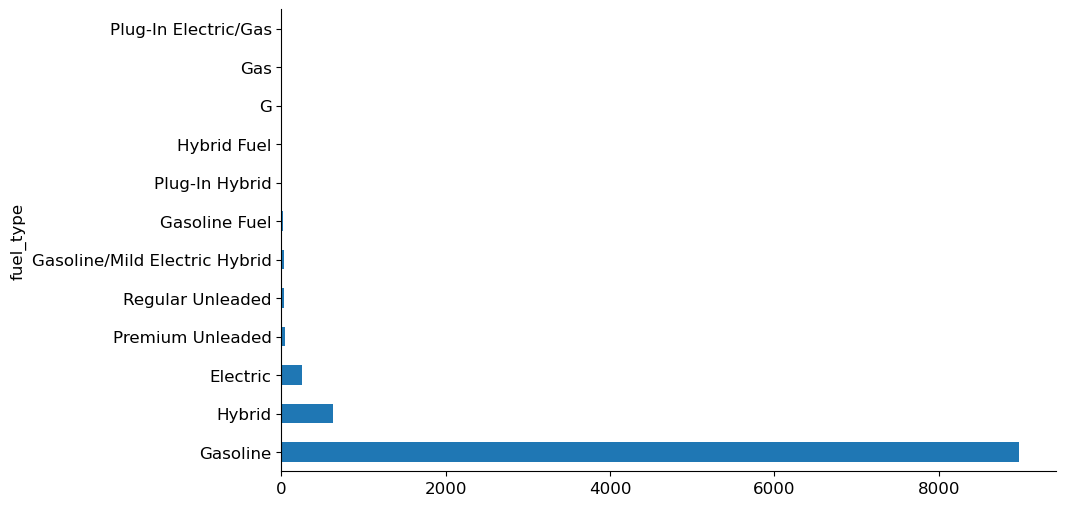

In [9]:
df_ft = cars.groupby("fuel_type").count().sort_values(["manufacturer"], ascending=False).reset_index()
df_ft.plot.barh(x="fuel_type",y="manufacturer",legend=False);

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

<font color="blue">
Hiervoor moet de <b>mediaanprijs</b> worden berekend. <br>
De mediaan wordt namelijk minder beïnvloed door outliers en extreme waarden dan het gemiddelde. <br>
De auto met de mediaanprijs als prijs, is de 'gewoonlijke' tweedehands Volvo. <br>
    
<br>

In [10]:
median_price = round(cars['price'].median())
car_with_median_price = cars[cars['price'] == median_price]

print(f"Mediaanprijs tweedehands Volvo: €{median_price}")
print(f"Voorbeeld van de 'gewoonlijke' tweedehands Volvo:") 
car_with_median_price 

Mediaanprijs tweedehands Volvo: €36673
Voorbeeld van de 'gewoonlijke' tweedehands Volvo:


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
3409,Volvo,XC40 R-Design,2020,35989.0,I-4 cyl,Automatic with Geartronic,AWD,Gasoline,NaN,Onyx Black Metallic,Charcoal,0.0,1.0,1.0,Borton Volvo Cars,4.0,4.9,50.0,NaN,36673.0


### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

<font color="blue">
De mediaan en het gemiddelde liggen ongeveer in het <b>midden</b> en vallen bijna samen. <br>
Dat komt omdat er nauwelijks outliers zijn en omdat de prijzen noch left-skewed, noch right-skewed zijn. <br>
Uit onderstaand histogram blijkt dat de prijs van tweedehands Volvo's <b>normaal</b> verdeeld is. <br>
Ook de Cumulatieve Distributiefunctie bevestigt normaalverdeelde prijzen. <br>
<br>

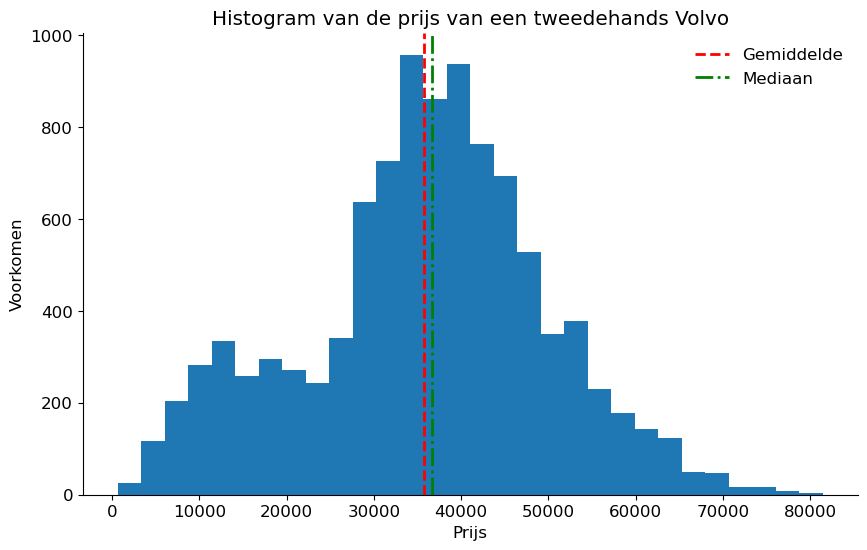

In [11]:
mean_price = cars['price'].mean()

plt.hist(cars['price'], bins=30)
plt.axvline
plt.xlabel('Prijs')
plt.ylabel('Voorkomen')
plt.title('Histogram van de prijs van een tweedehands Volvo')
plt.axvline(mean_price, color='red', linestyle='--', label='Gemiddelde')
plt.axvline(median_price, color='green', linestyle='-.', label='Mediaan')

plt.legend()
plt.show()


In [ ]:
res = stats.ecdf(cars['price'])
res.cdf.quantiles
res.cdf.probabilities
ax = plt.subplot()
res.cdf.plot(ax)
ax.set_xlabel('Prijs')
ax.set_ylabel('Ecdf')
plt.title('Cumulatieve Distributiefunctie van de prijs van een tweedehands Volvo')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.axvline(median_price, color='green', linestyle='-.', label='Mediaan')

plt.legend()
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

<font color="blue">
Eerder bleek al dat 3 fuel-types dominant vertegenwoordigd zijn in de dataset van tweedehands Volvo's. <br>
De prijsvergelijking beperkt zich dan ook tot die 3 fuel-types : <b>Gasoline, Hybrid and Electric</b>. <br>

<br>

In [14]:
# Alleen ELectric, Gasoline en Hybrid, zoals in de opgave
desired_fuel_types = ['Electric', 'Gasoline', 'Hybrid']
fuel_type_prices = cars[cars['fuel_type'].isin(desired_fuel_types)][['fuel_type', 'price']]

# Frequency counts voor prijs per fuel type
electric_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Electric']['price'].value_counts()
gasoline_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Gasoline']['price'].value_counts()
hybrid_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Hybrid']['price'].value_counts()

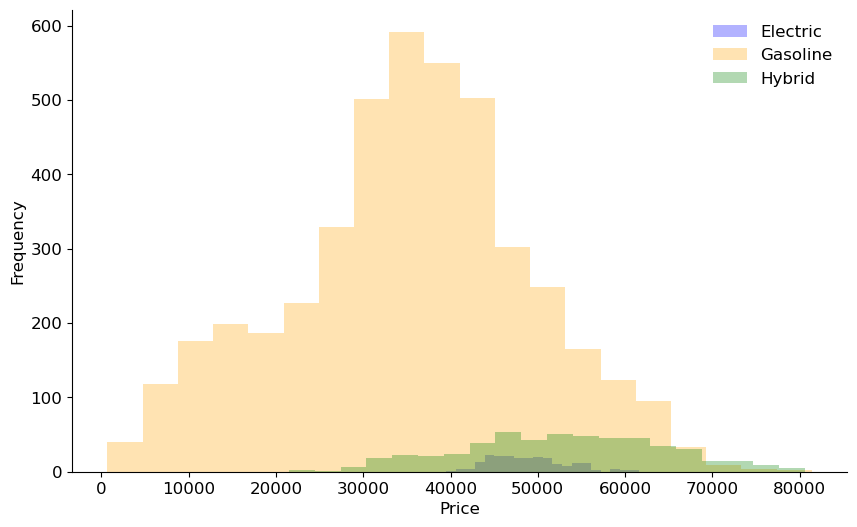

In [15]:
plt.hist(electric_counts.index, bins=20, alpha=0.3, color='blue')
plt.hist(gasoline_counts.index, bins=20, alpha=0.3, color='orange')
plt.hist(hybrid_counts.index, bins=20, alpha=0.3, color='green')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(['Electric', 'Gasoline', 'Hybrid'])

plt.show()

<font color="blue">
De bovenstaande plot maakt het overwicht in de dataset van tweedehands Volvo's met fuel-type Gasoline nogmaals duidelijk. <br>
Daardoor zijn de 3 histogrammen moeilijk vergelijkbaar. <br>
    
Door er <b>density histogrammen</b> van te maken, weegt het grote aantal van Gasoline Volvo's niet langer door en kunnen de prijsdistributies voor de 3 fuel-types vergeleken worden op basis van verhoudingen, niet alleen op basis van absolute aantallen. <br>
    
Een andere optie om prijzen te vergelijken, is het berekenen van de <b>mediaanprijs</b> voor elk fuel-type. <br>

<br>

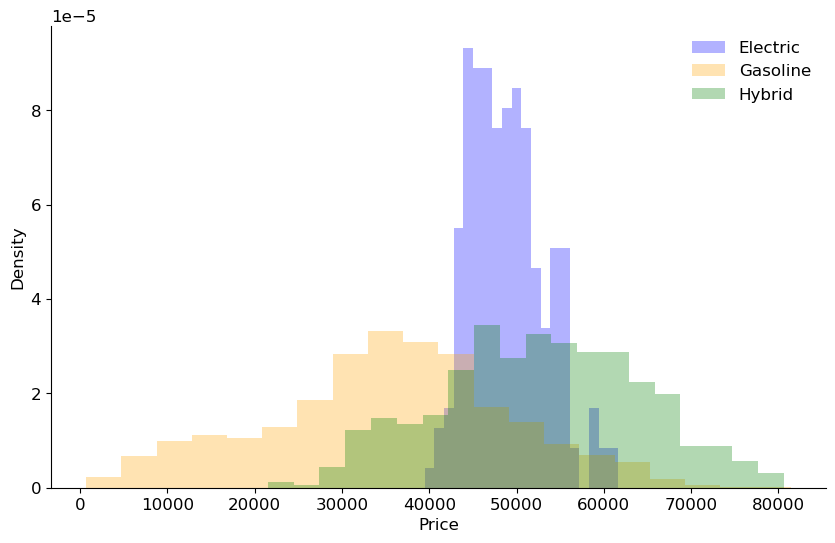

In [16]:
plt.hist(electric_counts.index, bins=20, alpha=0.3, color='blue', density=True)
plt.hist(gasoline_counts.index, bins=20, alpha=0.3, color='orange', density=True)
plt.hist(hybrid_counts.index, bins=20, alpha=0.3, color='green', density=True)

plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(['Electric', 'Gasoline', 'Hybrid'])
plt.show()

<font color="blue">
Uit bovenstaande plot blijkt dat : <br>
    - de prijs voor een Gasoline tweedehands Volvo heel sterk varieert; <br>
    - de gemiddelde prijs voor een Gasoline tweedehands Volvo een stuk lager ligt dan die voor een Hybride of Electrische tweedehands Volvo; <br>
    - de gemiddelde prijs voor een Hybride tweedehands Volvo en de gemiddelde prijs voor een Electrische tweedehands Volvo niet veel verschillen; <br>
    - de prijsvariantie voor een Hybride tweedehands Volvo wel hoger is als de prijsvariantie voor een Electrische tweedehands Volvo. <br>

<br>

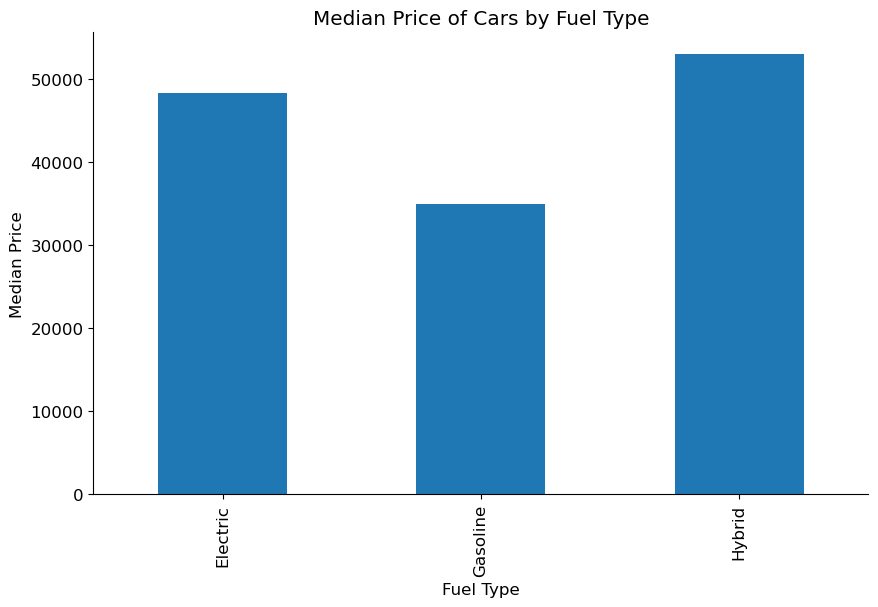

In [17]:
#Vergelijken van de mediaan prijs van elke fuel type
median_prices = fuel_type_prices.groupby('fuel_type')['price'].median()

median_prices.plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Median Price')
plt.title('Median Price of Cars by Fuel Type')

plt.show()


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

<font color="blue">
Onderstaande figuur toont de boxplots voor "Electric" en "Gasoline", 
met een horizontale lijn op  50 000 euro. <br>
    
<br>

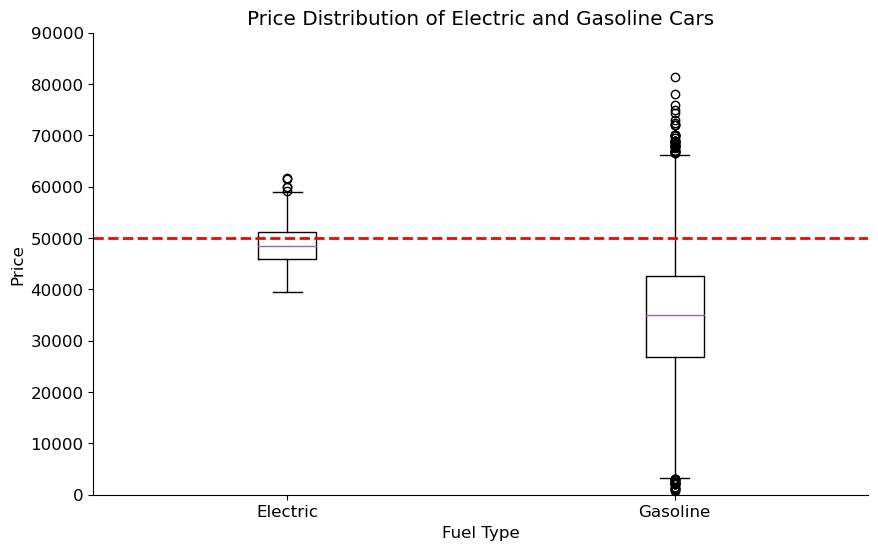

In [18]:
price_electric = cars.groupby('fuel_type').get_group('Electric')['price']
price_gasoline = cars.groupby('fuel_type').get_group('Gasoline')['price']

# list of lists data
combined_data = [price_electric.tolist(), price_gasoline.tolist()]

# Box plot
plt.boxplot(combined_data, labels=['Electric', 'Gasoline'], showfliers=True) 

plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.axhline(y=50000, color='r', linestyle='--')
plt.title('Price Distribution of Electric and Gasoline Cars')
plt.ylim(0, 90000)

plt.show()


<font color="blue">
    
- <i>De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.</i> <br>
    
    **Fout**, de spreiding op de prijs van elektrische wagens is kleiner dan die van benzinewagens. <br>
    De box en whiskers zijn namelijk korter, dus is de spreidingsbreedte kleiner. <br>
    <br> 
    
- <i>Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.</i> <br>
    
    Het is **niet mogelijk** om te besluiten of een wagen die meer dan 50 000 euro kost een grotere kans heeft om elektrisch te zijn dan benzine. <br> De boxplots zeggen iets over het minimum, het eerste kwartiel, de mediaan, het derde kwartiel en het maximum van een bepaalde populatie (Electric en Gasoline). We weten niet hoeveel auto's er in totaal in de verschillende populaties zitten, dus weten we niet of de kans groter is dat de wagen elektrisch of benzine zou zijn. <br>
    <br> 
    
- <i>Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.</i> <br>
    
    **Juist**, een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen. <br>
    Voor <u>elektrische</u> tweedehands Volvo's ligt de horizontale lijn van 50 000 euro <u>onder het derde kwartiel</u>, wat betekent dat er meer als 25% kans is dat een elektrische tweedehands Volvo meer dan 50 000 euro kost. <br>
    Voor <u>benzine</u> tweedehands Volvo's ligt de horizontale lijn van 50 000 euro <u>boven het derde kwartiel</u>, wat betekent dat er minder als 25% kans is dat een benzine tweedehands Volvo meer dan 50 000 euro kost. <br>
    
<br>    


### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

<font color="blue"> 
Een scatterplot toont een eerste visualizatie van het verband tussen mileage en price. <br>
Het valt onmiddellijk op dat er één sterke outlier is voor mileage (> 10**6 km). <br>
    
<br> 

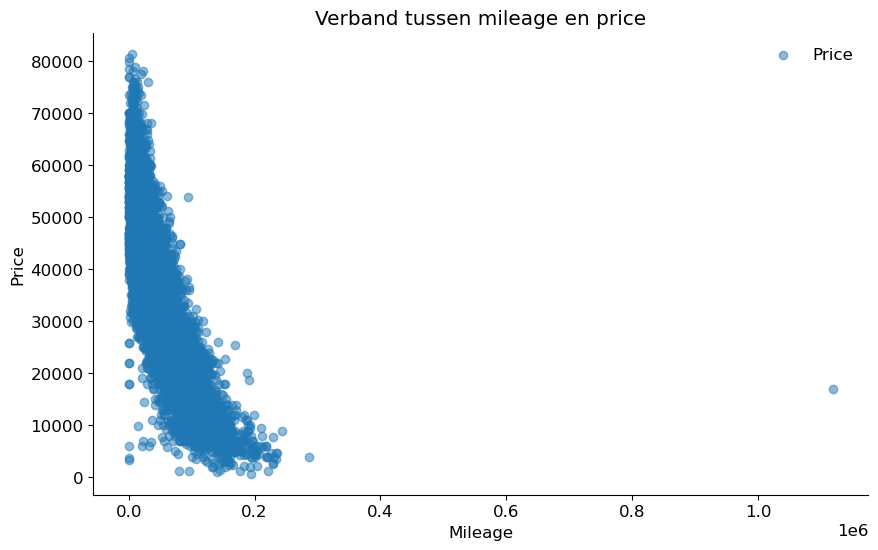

In [19]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot om afwijking te zien
plt.scatter(cars['mileage'], cars['price'], alpha=0.5, label='Price');

plt.title('Verband tussen mileage en price')
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.legend()
plt.show()

<font color="blue"> 
De afwijkende observatie, alsook de observaties met missing mileage, worden uit de dataset verwijderd. <br>
Daarna wordt de dataset gesorteerd volgens mileage en prijs, wat ons in staat stelt "rolling price means" te berekenen. <br>
Rolling price means (window=100) : price mean van observatie 0-99, price mean van observatie 1-100, price mean van observatie 2-101, ... <br>
    
<br> 

In [20]:
# Verwijderen van één verre outlier
cars_mp = cars[cars['mileage'] != cars["mileage"].max()].copy()
cars_mp.shape

(10028, 20)

In [21]:
# Verwijderen van missing mileages
cars_mp = cars_mp.dropna(subset=["mileage"])
cars_mp.shape

(10025, 20)

In [22]:
cars_mp = cars_mp.sort_values(["mileage", "price"]).reset_index(drop=True)
cars_mp.shape

(10025, 20)

In [23]:
cars_mp = cars_mp.reindex(columns=["mileage","price"])
cars_mp.shape

(10025, 2)

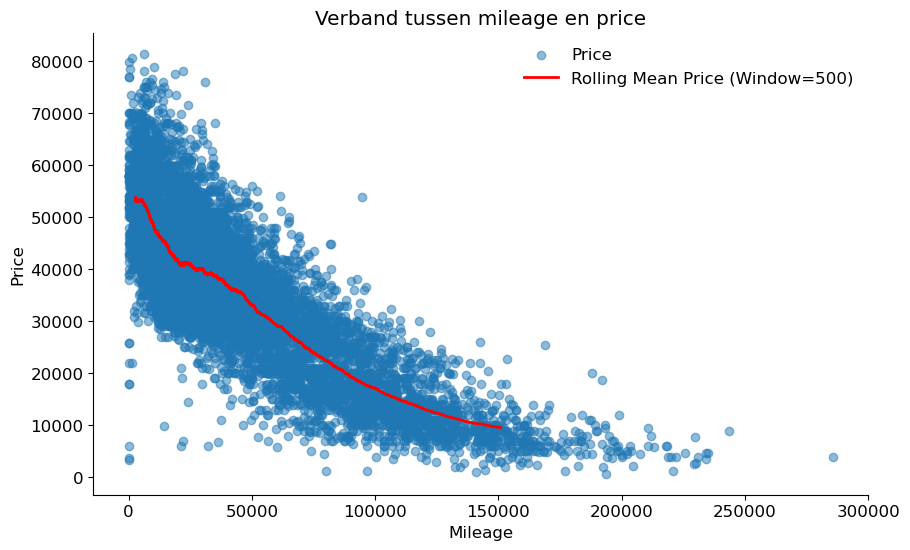

In [24]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot om afwijking te zien
plt.scatter(cars_mp['mileage'], cars_mp['price'], alpha=0.5, label='Price');

w = 500
# Plot rolling means 
cars_mp.rolling(window=w).mean().plot(x='mileage', y='price', color='red', linewidth=2, label=f'Rolling Mean Price (Window={w})', ax=plt.gca());

plt.title('Verband tussen mileage en price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()

plt.show()


<font color="blue"> 
Bovenstaande plot toont de verwachte negative correlatie tussen mileage en price. <br>
Hoe meer mileages, hoe lager de price. <br>
    
Tot slot wordt de <b>correlatiecoëfficiënt</b> tussen mileage en price berekend. <br>
    
<br>

In [25]:
cars_mp[['mileage', 'price']].corr()

,mileage,price
mileage,1.000000,-0.805603
price,-0.805603,1.000000


<!-- <font color="blue"> Hiervoor hebben we een line chart gemaakt. 
Deze was heel druk, dus hebben we gedownsampled om minder punten te plotten. 
Een andere mogelijke visualisatie is een scatterplot met een rolling window. 
Zo zien we duidelijk een negatieve correlatie tussen mileage en price. 
De scatterplot toont wel een grote afwijking. -->

### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s <b>48 788 euro</b>; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

<font color="blue">
    De accuraatheid van de schatting kan worden nagegaan door het <b>confidence interval</b> voor het gemiddelde te berekenen. <br>
    Dat kan via de centrale limietstelling of via bootstrapping. <br>
   

Om de accuraatheid te onderzoeken, moeten we een aantal statistische maatstaven berekenen. 
In eerste instantie zijn dat de standaarddeviatie en variantie.

In [45]:
electric_cars = cars[cars['fuel_type'] =='Electric'].reindex(columns=["price"])
electric_mean = electric_cars['price'].mean()
electric_std_dev = electric_cars['price'].std()
electric_variance = electric_cars['price'].var()
print(f"Gemiddelde prijs: ${electric_mean:.2f}")
print(f"Standaarddeviatie: ${electric_std_dev:.2f}")
print(f"Variantie: ${electric_variance:.2f}")

Gemiddelde prijs: $48788.39
Standaarddeviatie: $4162.03
Varaiantie: $17322483.24


Ten tweede kunnen we het confidence interval berekenen voor een niveau van 95%

In [28]:
electric_cars = cars[cars['fuel_type'] =='Electric'].reindex(columns=["price"])
electric_cars.shape

(253, 1)

In [56]:
std_err = std_dev / np.sqrt(len(electric_cars))
confidence_level = 0.95
confidence_interval = stats.norm.interval(confidence_level, loc=electric_mean, scale=std_err)
print(f"95% Confidence Interval ondergrens: {confidence_interval[0]}")
print(f"95% Confidence Interval bovengrens: {confidence_interval[1]}")


95% Confidence Interval ondergrens: [48275.53829844]
95% Confidence Interval bovengrens: [49301.24431026]


Tot slot kunnen we de accuratesse nagaan d.m.v. bootstrapping


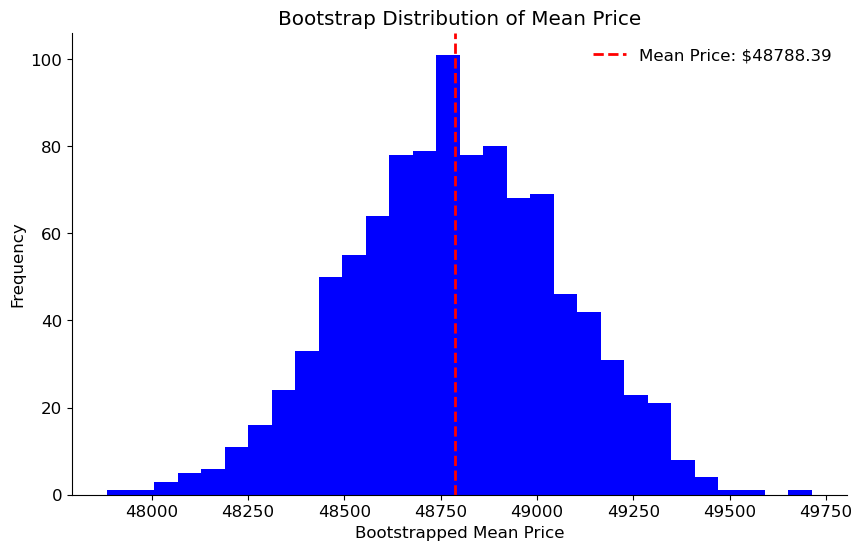

In [60]:
bootstrap_means = []
num_resamples = 1000
for _ in range(num_resamples):
    sample = electric_cars['price'].sample(n=len(electric_cars), replace=True)
    bootstrap_means.append(sample.mean())
    
# Plot the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='blue')
plt.axvline(electric_mean, color='red', linestyle='--', linewidth=2, label=f'Mean Price: ${electric_mean:.2f}')
plt.xlabel('Bootstrapped Mean Price')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Price')
plt.legend()


<font color="blue">
    De Centrale Limietstelling zegt dat het Steekproefgemiddelde (hier gelijk aan 48 788 euro), bij benadering normaal verdeeld is met verwachting <i>mu</i> en standaardafwijking <i>sigma / sqrt(sample size)</i>. <br>
   